In [85]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [86]:
def arbsim(token_price, max_range, spread, gas_fee, slippage, fee, token_amount):
    """Calculates mean profit for an arbitrage strategy, assuming 100 buy/sell pairs.

    Args:
        token_price (float): price of token in $.
        max_range (float): difference between high and low in 1m candle, in $.
        spread (float): absolute value of the difference between the price of token in 2 different exchanges, in $.
        gas_fee (float): gas fee per transaction in $.
        slippage (float): your slippage as a ratio (between 0.00 and 0.99).
        fee (float): fee amount as a ratio of token.
        token_amount (int): number of tokens per transaction.
    """
    vol_range = []  # Range of every 1min candle.
    for i in range(0, 101):
        x = random.uniform(-max_range, max_range)
        vol_range.append(x)
    profit = []
    for vol in vol_range:
        y = token_amount*spread + token_amount*vol - (2*gas_fee) - (2*slippage*token_price*token_amount) - (2*token_amount*token_price*fee)
        profit.append(y)
    print("Mean profit is", round(np.mean(profit), 4), "dollars for", token_amount, "tokens.")
    plt.plot(profit)
    return np.mean(profit)

def testArbsim(test_list):
    """_summary_

    Args:
        test_list (list): a list of 5 element tuples (positional arguments for function arbsim)
    """
    for arguments in test_list:
        arbsim(*arguments)

Mean profit is -7.2219 dollars for 100 tokens.


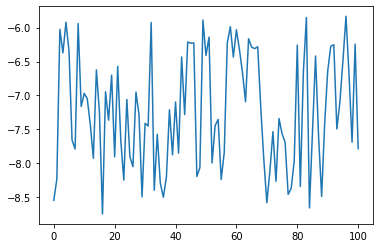

In [87]:
mean_profit = arbsim(12.62, 0.015, 0.0027, 0.00000032942, 0.00, 0.003,100)